In [410]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import time

%matplotlib inline

In [411]:
os.listdir()

['inverted.csv',
 'yield_curve_data.csv',
 '.DS_Store',
 'csv_etfs_list.pickle',
 'data.csv',
 'ETF_sectors',
 '2000inversion.csv',
 '2007inversion.csv',
 'Yield_curve_data',
 'analyze_etfs.py',
 'ETFs',
 'yield_curve.py',
 'During After Inversion.ipynb',
 'Correlations.ipynb',
 '.ipynb_checkpoints',
 'etfs.py']

In [412]:
df2000 = pd.read_csv('2000inversion.csv', sep = ';', index_col=0).drop(['T10Y2Y', 'FEDFUNDS'], axis = 1)

In [413]:
df2000.head()

,GDX_materials,XLB_materials,VAW_materials,VFH_financials,XLF_financials,KRE_financials,VCR_consumer_disc,XLY_consumer_disc,IYC_consumer_disc,VDE_energy,...,VIS_industrials,ITA_industrials,XLI_industrials,QQQ_tech,XLK_tech,VGT_tech,RWR_real_estate,VNQ_real_estate,IYR_real_estate,Inverted
2000-12-31,NaN,21.421875,NaN,NaN,23.964256,NaN,NaN,25.593750,NaN,NaN,...,NaN,NaN,31.250000,58.375000,31.312500,NaN,NaN,NaN,37.974998,1
2001-01-31,NaN,20.850000,NaN,NaN,23.907393,NaN,NaN,28.570000,NaN,NaN,...,NaN,NaN,31.370001,64.300003,37.299999,NaN,NaN,NaN,38.150002,0
2001-02-28,NaN,21.120001,NaN,NaN,22.298944,NaN,NaN,26.530001,NaN,NaN,...,NaN,NaN,29.490000,47.450001,28.010000,NaN,NaN,NaN,37.625000,0
2001-03-31,NaN,19.969999,NaN,NaN,21.559708,NaN,NaN,26.090000,NaN,NaN,...,NaN,NaN,26.590000,39.150002,24.799999,NaN,NaN,NaN,37.470001,0
2001-04-30,NaN,22.100000,NaN,NaN,22.339561,NaN,NaN,27.299999,NaN,NaN,...,NaN,NaN,29.629999,46.150002,28.809999,NaN,NaN,NaN,38.680000,0


In [414]:
df2000.tail()

,GDX_materials,XLB_materials,VAW_materials,VFH_financials,XLF_financials,KRE_financials,VCR_consumer_disc,XLY_consumer_disc,IYC_consumer_disc,VDE_energy,...,VIS_industrials,ITA_industrials,XLI_industrials,QQQ_tech,XLK_tech,VGT_tech,RWR_real_estate,VNQ_real_estate,IYR_real_estate,Inverted
2003-08-31,NaN,22.980000,NaN,NaN,20.568644,NaN,NaN,29.000000,NaN,NaN,...,NaN,NaN,24.030001,33.389999,18.440001,NaN,45.169998,NaN,45.000000,0
2003-09-30,NaN,21.830000,NaN,NaN,20.641754,NaN,NaN,27.580000,NaN,NaN,...,NaN,NaN,23.290001,32.419998,18.280001,NaN,46.066666,NaN,45.705002,0
2003-10-31,NaN,23.910000,NaN,NaN,22.071487,NaN,NaN,30.090000,NaN,NaN,...,NaN,NaN,24.730000,35.180000,19.620001,NaN,46.779999,NaN,46.500000,0
2003-11-30,NaN,24.450001,NaN,NaN,21.990252,NaN,NaN,30.360001,NaN,NaN,...,NaN,NaN,25.219999,35.380001,19.900000,NaN,48.863335,NaN,48.520000,0
2003-12-31,NaN,26.690001,NaN,NaN,22.851341,NaN,NaN,31.490000,NaN,NaN,...,NaN,NaN,26.760000,36.459999,20.379999,NaN,49.926666,NaN,49.634998,0


# DEALING WITH RETURNS AFTER THE YIELD CURVE GOT TO NORMAL LEVELS

# AFTER 2000 INVERSION 

In [477]:
#BUY n Hold Return 
first2000 = df2000.loc['2000-12-31']
last2000 = df2000.loc['2003-12-31']

#this are the returns after 3 years of the inversion of the yield curve 
return2000 = (last2000 - first2000) / first2000
return2000 = return2000 * 100

#Choosing only the Five Best returns 
best_2000_after = return2000.sort_values(ascending=False)
best_2000_after = best_2000_after[best_2000_after > 0] #Selecting only the positive Values
best_2000_after.head()

IYR_real_estate      30.704412
XLB_materials        24.592273
XLY_consumer_disc    23.037851
XLV_healthcare       10.642202
dtype: float64

# AFTER 2006 - 2007 INVERSION

In [478]:
df2007 = pd.read_csv('2007inversion.csv', sep = ';', index_col=0).drop(['T10Y2Y', 'FEDFUNDS'], axis = 1)

In [479]:
df2007.head()

,GDX_materials,XLB_materials,VAW_materials,VFH_financials,XLF_financials,KRE_financials,VCR_consumer_disc,XLY_consumer_disc,IYC_consumer_disc,VDE_energy,...,VIS_industrials,ITA_industrials,XLI_industrials,QQQ_tech,XLK_tech,VGT_tech,RWR_real_estate,VNQ_real_estate,IYR_real_estate,Inverted
2007-05-31,39.160000,40.900002,84.750000,67.199997,30.787977,47.580002,64.540001,40.099998,NaN,99.790001,...,73.900002,62.470001,39.130001,47.410000,25.650000,57.290001,90.349998,78.949997,85.620003,1
2007-06-30,37.889999,40.500000,84.410004,63.849998,29.390739,45.880001,63.470001,39.330002,NaN,101.129997,...,73.830002,62.830002,39.040001,47.599998,25.600000,57.619999,81.150002,70.949997,77.419998,0
2007-07-31,39.939999,39.419998,82.089996,58.759998,26.726238,41.639999,59.830002,37.000000,NaN,100.470001,...,74.419998,63.730000,39.410000,47.529999,25.549999,56.869999,74.489998,65.089996,70.400002,0
2007-08-31,37.650002,39.150002,82.139999,60.330002,27.416735,44.599998,59.980000,37.230000,NaN,101.080002,...,73.959999,65.089996,39.419998,48.869999,26.040001,58.509998,78.699997,69.480003,74.099998,0
2007-09-30,45.349998,42.110001,87.940002,60.880001,27.879772,44.029999,59.849998,36.830002,NaN,108.660004,...,77.010002,69.629997,41.080002,51.410000,26.969999,60.599998,81.209999,71.459999,76.470001,0


In [480]:
df2007.tail()

,GDX_materials,XLB_materials,VAW_materials,VFH_financials,XLF_financials,KRE_financials,VCR_consumer_disc,XLY_consumer_disc,IYC_consumer_disc,VDE_energy,...,VIS_industrials,ITA_industrials,XLI_industrials,QQQ_tech,XLK_tech,VGT_tech,RWR_real_estate,VNQ_real_estate,IYR_real_estate,Inverted
2011-01-31,53.919998,38.439999,82.760002,33.669998,13.322502,26.129999,59.889999,37.180000,NaN,106.680000,...,67.139999,62.320000,36.240002,56.000000,25.990000,63.939999,63.070000,57.169998,57.959999,0
2011-02-28,59.830002,39.459999,85.190002,34.630001,13.688059,26.700001,63.220001,39.410000,NaN,114.709999,...,68.919998,62.939999,37.009998,57.770000,26.559999,65.500000,66.070000,59.860001,60.580002,0
2011-03-31,60.099998,40.020000,87.360001,33.889999,13.314379,26.629999,63.139999,39.049999,NaN,116.730003,...,70.370003,64.230003,37.669998,57.430000,26.059999,64.230003,64.599998,58.470001,59.400002,0
2011-04-30,62.200001,40.869999,89.610001,34.130001,13.306255,26.740000,65.680000,40.549999,NaN,118.089996,...,72.169998,64.760002,38.700001,59.080002,26.740000,66.190002,68.449997,61.830002,62.169998,0
2011-05-31,58.150002,39.750000,87.129997,33.200001,12.867587,25.889999,65.510002,40.439999,NaN,112.910004,...,70.019997,64.519997,37.630001,58.360001,26.459999,64.989998,69.440002,62.680000,62.799999,0


In [481]:
#BUY n Hold Return 
first2007 = df2007.loc['2007-05-31']
last2007 = df2007.loc['2011-05-31']
return2007 = (last2007 - first2007) / first2007
return2007 = return2007 * 100

#THE BEST
best_2007_after = return2007.sort_values(ascending=False) 
best_2007_after = best_2007_after[best_2007_after > 0] #selecting the positive ones 
best_2000_after.head()

IYR_real_estate      30.704412
XLB_materials        24.592273
XLY_consumer_disc    23.037851
XLV_healthcare       10.642202
dtype: float64

# PERFORMANCE DURING INVERSION

# DURING 2000 INVERSION

In [482]:
df_inv = pd.read_csv('inverted.csv', sep = ';', index_col = 0).drop(['T10Y2Y', 'FEDFUNDS'], axis = 1)

In [483]:
df_inv2000 = df_inv.loc[:'2006-02-28']

In [484]:
#BUY n Hold Return 
first_inv_2000 = df_inv2000.iloc[0]
last_inv_2000 = df_inv2000.iloc[-1]
return_inverted_2000 = (last_inv_2000 - first_inv_2000) / first_inv_2000
return_inverted_2000 = return_inverted_2000 * 100

#THE BEST 
best_2000_during = return_inverted_2000.sort_values(ascending = False)
best_2000_during = best_2000_during[best_2000_during > 0] #selecting the positive ones 
best_2000_during.head()

XLE_energy           100.105137
XLF_financials        58.446142
XLB_materials         48.014887
XLU_utilities         34.136422
XLY_consumer_disc     30.296841
dtype: float64

# DURING 2006 INVERSION

In [485]:
df_inv2006 = df_inv.loc['2006-02-28':]

In [486]:
#BUY n Hold Return 
first_inv_2006 = df_inv2006.iloc[0]
last_inv_2006 = df_inv2006.iloc[-1]
return_inv_2006 = (last_inv_2006 - first_inv_2006) / first_inv_2006
return_inv_2006 = return_inv_2006 * 100

#THE BEST 
best_2006_during = return_inv_2006.sort_values(ascending = False)
best_2006_during = best_2006_during[best_2006_during > 0] #selecting the positive ones 
best_2006_during.head()

IXP_telecom             46.149184
VOX_telecom             41.206033
IYZ_telecom             38.964691
IEV_consumer_staples    37.101489
VAW_materials           35.318535
dtype: float64

# CHECKING THE BEST ETFS


In [487]:
def check_during_after(during, after):
    """
    Pass two Series of ETFs as parameters and check whether they are present both during and after.
    """

    common = [el for el in during.index if el in after.index]
    
    if common == 0:
        return 'No Common Performance'
    
    for etf in common:
        print(f'Current Etf is {etf}. Performance during inversion {round(during.loc[etf], 2)}%. Performance after the invesion {round(after.loc[etf], 2)}%')


In [488]:
#2000 Check        
check_during_after(best_2000_during, best_2000_after)
#do not count negative returns 

Current Etf is XLB_materials. Performance during inversion 48.01%. Performance after the invesion 24.59%
Current Etf is XLY_consumer_disc. Performance during inversion 30.3%. Performance after the invesion 23.04%
Current Etf is XLV_healthcare. Performance during inversion 15.49%. Performance after the invesion 10.64%


In [489]:
#2006/7 Check        
check_during_after(best_2006_during, best_2007_after)

Current Etf is VAW_materials. Performance during inversion 35.32%. Performance after the invesion 2.81%
Current Etf is VDE_energy. Performance during inversion 32.96%. Performance after the invesion 13.15%
Current Etf is XLE_energy. Performance during inversion 30.49%. Performance after the invesion 12.9%
Current Etf is VDC_consumer_staples. Performance during inversion 20.99%. Performance after the invesion 18.95%
Current Etf is VCR_consumer_disc. Performance during inversion 20.1%. Performance after the invesion 1.5%
Current Etf is XLY_consumer_disc. Performance during inversion 19.81%. Performance after the invesion 0.85%
Current Etf is XLK_tech. Performance during inversion 18.48%. Performance after the invesion 3.16%
Current Etf is XLP_consumer_staples. Performance during inversion 18.02%. Performance after the invesion 16.35%
Current Etf is QQQ_tech. Performance during inversion 15.35%. Performance after the invesion 23.1%
Current Etf is VGT_tech. Performance during inversion 15.

# VISUALIZATION - DATAFRAMES OF BEST POSITIVE PERFORMANCES TO PERFORM OPERATIONS 

In [490]:
def build_best_performers(during, after):
    
    df_during = pd.DataFrame(during, columns=['Before Inversion']).transpose()
    df_after = pd.DataFrame(after, columns=['After Inversion']).transpose()
    
    return df_during.append(df_after).transpose().dropna()


df_best_2000 = build_best_performers(best_2000_during, best_2000_after).apply(lambda x: round(x, 2))
df_best_2006 = build_best_performers(best_2006_during, best_2007_after).apply(lambda x: round(x, 2))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Text(0.5,1,'2000 Positive Performers Before and After Inversion')

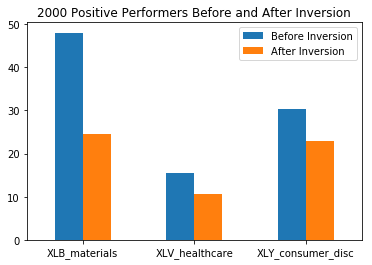

In [491]:
plt.figure(figsize= (10, 6))
df_best_2000.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('2000 Positive Performers Before and After Inversion')

Text(0.5,1,'2006 Positive Performers Before and After Inversion')

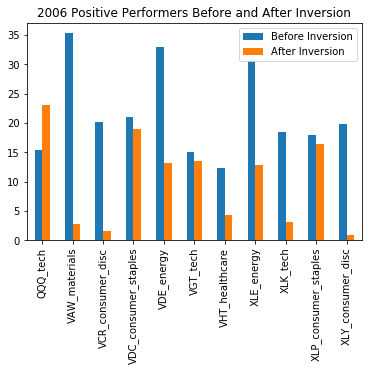

In [492]:
plt.figure(figsize= (10, 6))
df_best_2006.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.title('2006 Positive Performers Before and After Inversion')